# Introducción al aprendizaje estadístico y de máquinas

## Qué es el aprendizaje estadístico y de máquinas

El aprendizaje estadístico y de máquinas es un campo de estudio que permite a las computadoras aprender sin ser explícitamente programadas. Se trata de un subcampo de la inteligencia artificial. El aprendizaje estadístico y de máquinas se basa en la idea de que los sistemas pueden aprender de los datos, identificar patrones y tomar decisiones con un mínimo de intervención humana. El aprendizaje estadístico y de máquinas se utiliza en una amplia gama de aplicaciones, desde la detección de fraudes en tarjetas de crédito hasta la clasificación de correos electrónicos no deseados.

## Tipos de aprendizaje

### Aprendizaje supervisado

El aprendizaje supervisado es un tipo de aprendizaje en el que el algoritmo aprende a partir de un conjunto de datos de entrenamiento etiquetados. En el aprendizaje supervisado, el algoritmo recibe un conjunto de datos de entrenamiento que incluye ejemplos de entrada y salida. El algoritmo aprende a partir de estos ejemplos y luego se utiliza para predecir la salida para nuevos ejemplos. El aprendizaje supervisado se utiliza en una amplia gama de aplicaciones, desde la clasificación de imágenes hasta la predicción de precios de acciones.

### Aprendizaje no supervisado

El aprendizaje no supervisado es un tipo de aprendizaje en el que el algoritmo aprende a partir de un conjunto de datos de entrenamiento no etiquetados. En el aprendizaje no supervisado, el algoritmo recibe un conjunto de datos de entrenamiento que no incluye ejemplos de salida. El algoritmo aprende a partir de estos ejemplos y luego se utiliza para identificar patrones en los datos. El aprendizaje no supervisado se utiliza en una amplia gama de aplicaciones, desde la segmentación de clientes hasta la detección de anomalías.

### Aprendizaje por refuerzo

El aprendizaje por refuerzo es un tipo de aprendizaje en el que el algoritmo aprende a partir de la interacción con un entorno. En el aprendizaje por refuerzo, el algoritmo recibe una recompensa o una penalización en función de sus acciones. El algoritmo aprende a partir de estas recompensas y penalizaciones y luego se utiliza para tomar decisiones en el futuro. El aprendizaje por refuerzo se utiliza en una amplia gama de aplicaciones, desde la conducción autónoma hasta los juegos de mesa.

# Aprendizaje supervisado

## Regresión

La regresión es un tipo de aprendizaje supervisado en el que el algoritmo aprende a partir de un conjunto de datos de entrenamiento etiquetados. En la regresión, el algoritmo aprende a partir de ejemplos de entrada y salida y luego se utiliza para predecir la salida para nuevos ejemplos. La regresión se utiliza en una amplia gama de aplicaciones, desde la predicción de precios de acciones hasta la predicción de la temperatura.

## Clasificación

La clasificación es un tipo de aprendizaje supervisado en el que el algoritmo aprende a partir de un conjunto de datos de entrenamiento etiquetados. En la clasificación, el algoritmo aprende a partir de ejemplos de entrada y salida y luego se utiliza para predecir la clase de un nuevo ejemplo. La clasificación se utiliza en una amplia gama de aplicaciones, desde la detección de fraudes en tarjetas de crédito hasta la clasificación de imágenes.

## Regresión lineal

La regresión lineal es un método estadístico que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. La regresión lineal se utiliza para predecir el valor de la variable dependiente en función de los valores de las variables independientes. La regresión lineal es un método simple pero potente que se utiliza en una amplia gama de aplicaciones, desde la predicción de precios de acciones hasta la predicción de la temperatura.

In [2]:
import numpy as np
import pandas as pd
import global_vars as gv
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargamos el dataset
cars = pd.read_csv(f'{gv.GLOBAL_PATH}/data/cars.csv')

In [4]:
# Mostramos las primeras filas del dataset
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Ejemplo con variable Engine HP

In [5]:
# Creamos un modelo de regresión lineal
cars_example = cars[['Engine HP', 'MSRP']].dropna()
X = cars_example['Engine HP']
y = cars_example['MSRP']

In [6]:
# creamos el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [7]:
# Mostramos el resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     9239.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:17:51   Log-Likelihood:            -1.4376e+05
No. Observations:               11845   AIC:                         2.875e+05
Df Residuals:                   11843   BIC:                         2.875e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.055e+04   1034.584    -48.861      0.000   -5.26e+04   -4.85e+04
Engine HP    365.2884      3.800     96.122      0.000     357.839     372.737
==============================================================================
Omnibus:                    23384.991   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104894451.425
Skew:                          15.630   Prob(JB):                         0.00
Kurtosis:                     462.953   Cond. No.                         679.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Hacemos una predicción
X_new = pd.DataFrame({'const': [1], 'Engine HP': [200]})
X_new

,const,Engine HP
0,1,200


In [9]:
# Hacemos la predicción
X_new = sm.add_constant(X_new)

In [10]:
model.predict(X_new)

0    22507.039255
dtype: float64

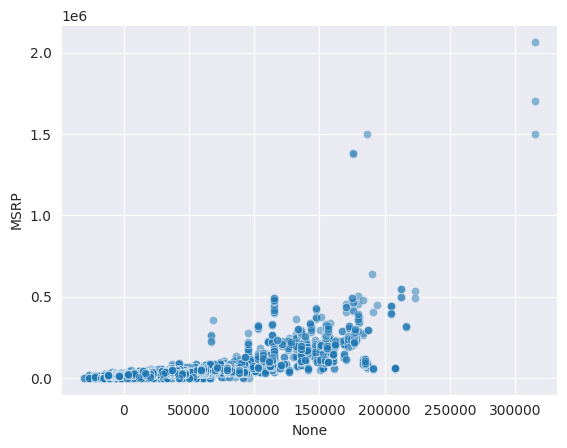

In [11]:
# Grafiacamos reales vs predicciones
predictions = model.predict(X)
sns.scatterplot(x=predictions, y=y , alpha=0.5)
plt.show()

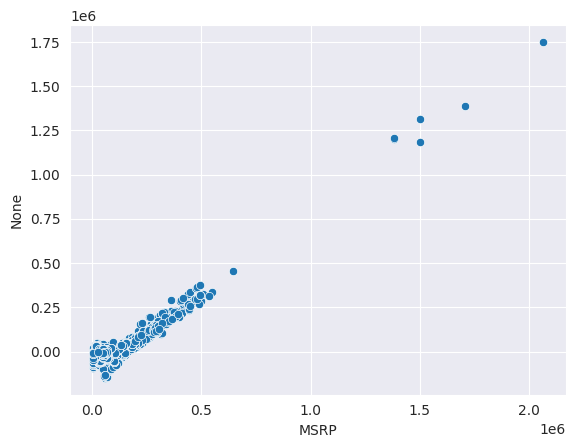

In [12]:
# Graficamos los residuos
sns.scatterplot(x=y, y=model.resid)
plt.show()

In [13]:
# Forzar la intersección en 0
X = cars_example['Engine HP']
y = cars_example['MSRP']
model = sm.OLS(y, X).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MSRP   R-squared (uncentered):                   0.535
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                          1.365e+04
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:17:58   Log-Likelihood:                     -1.4485e+05
No. Observations:               11845   AIC:                                  2.897e+05
Df Residuals:                   11844   BIC:                                  2.897e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Engine HP    195.1935      1.671    116.836      0.000     191.919     198.468
==============================================================================
Omnibus:                    23742.659   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100923956.873
Skew:                          16.240   Prob(JB):                         0.00
Kurtosis:                     454.037   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Hacemos una predicción
X_new = pd.DataFrame({'Engine HP': [200]})
X_new

,Engine HP
0,200


In [16]:
# Hacemos la predicción
model.predict(X_new)

0    39038.707355
dtype: float64

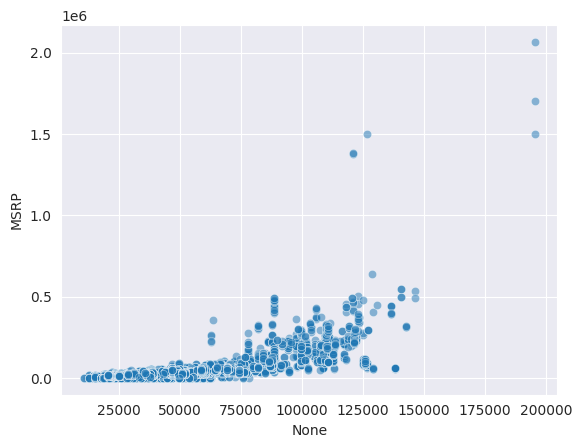

In [17]:
# Grafiacamos reales vs predicciones
predictions = model.predict(X)
sns.scatterplot(x=predictions, y=y , alpha=0.5)
plt.show()

## Modelo con más de una covariable

In [18]:
cars_example = cars[['Engine HP', 'Engine Cylinders', 'MSRP']].dropna()
X = cars_example[['Engine HP', 'Engine Cylinders']]
y = cars_example['MSRP']

In [19]:
model = sm.OLS(y, X).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MSRP   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                              7573.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        20:31:51   Log-Likelihood:                     -1.4416e+05
No. Observations:               11816   AIC:                                  2.883e+05
Df Residuals:                   11814   BIC:                                  2.883e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Engine HP          361.4975      6.437     56.160      0.000     348.880     374.115
Engine Cylinders -7909.9849    296.392    -26.688      0.000   -8490.962   -7329.007
==============================================================================
Omnibus:                    23606.089   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99943510.583
Skew:                          16.113   Prob(JB):                         0.00
Kurtosis:                     452.401   Cond. No.                         182.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo con más de dos variables

In [20]:
cars_example = cars[['Engine HP', 'highway MPG', 'city mpg', 'Popularity', 'Number of Doors', 'Engine Cylinders', 'MSRP']].dropna()
X = cars_example[['Engine HP', 'highway MPG', 'city mpg', 'Popularity']]
y = cars_example['MSRP']

In [21]:
model = sm.OLS(y, X).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MSRP   R-squared (uncentered):                   0.592
Model:                            OLS   Adj. R-squared (uncentered):              0.592
Method:                 Least Squares   F-statistic:                              4280.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:18:10   Log-Likelihood:                     -1.4372e+05
No. Observations:               11815   AIC:                                  2.875e+05
Df Residuals:                   11811   BIC:                                  2.875e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Engine HP     296.6496      3.001     98.840      0.000     290.766     302.533
highway MPG -1098.5349    100.169    -10.967      0.000   -1294.883    -902.187
city mpg      259.3460    125.203      2.071      0.038      13.928     504.764
Popularity     -4.6985      0.292    -16.089      0.000      -5.271      -4.126
==============================================================================
Omnibus:                    23255.378   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99676665.998
Skew:                          15.540   Prob(JB):                         0.00
Kurtosis:                     451.897   Cond. No.                         789.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_new = pd.DataFrame({'Engine HP': [200], 'highway MPG': [30], 'city mpg': [20], 'Popularity': [1000]})
X_new

,Engine HP,highway MPG,city mpg,Popularity
0,200,30,20,1000


In [24]:
model.predict(X_new)

0    26862.271406
dtype: float64

In [25]:
cars_example['predicted'] = model.predict(X)

<Axes: xlabel='predicted', ylabel='MSRP'>

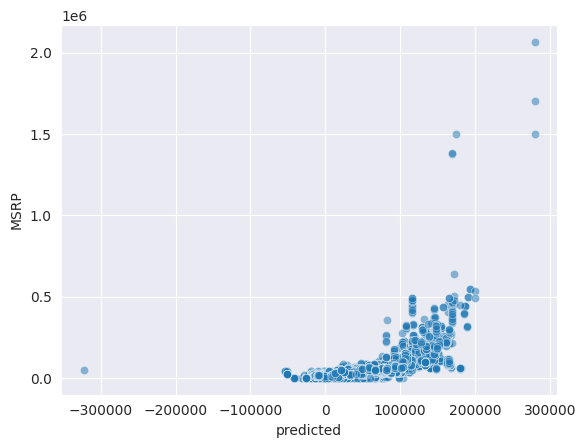

In [26]:
sns.scatterplot(x='predicted', y='MSRP', data=cars_example, alpha=0.5)

Con sklearn se estandarizan los datos a cambio de mayor velocidad de cómputo.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [28]:
# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X.agg(['mean', 'std'])

,Engine HP,highway MPG,city mpg,Popularity
mean,249.480491,26.320609,19.32755,1553.407533
std,109.203463,7.442674,6.52701,1439.986399


In [30]:
# Creamos el modelo
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [31]:
# Coeficientes del modelo
model.coef_

array([43073.70455388,   932.34088861,  5652.57382125, -4417.5851355 ])

In [32]:
# Hacemos una predicción
X_new = pd.DataFrame({'Engine HP': [200], 'highway MPG': [30], 'city mpg': [20], 'Popularity': [1000]})
X_new_scaled = scaler.transform(X_new)
X_new_scaled

array([[-0.45312286,  0.49438501,  0.10303014, -0.38433068]])

 ## Modelo lineal con todas las variables

In [34]:
variables_numericas = cars.select_dtypes(include=[np.number]).columns

In [35]:
print(variables_numericas)

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [37]:
variables_categoricals =   [x for x in cars.columns if x not in variables_numericas]

In [38]:
print(variables_categoricals)

['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


In [39]:
def count_var_categ(sample: pd.Series) -> pd.DataFrame:
    conteo = sample.value_counts().reset_index()
    total = float(np.sum(conteo['count']))
    conteo['Porc %'] = np.round(conteo['count']/total*100,2)
    return conteo

In [40]:
for var in variables_categoricals:
    print(f"Los valores únicos de la variable {var} son:\n{count_var_categ(cars[var])} \n")

Los valores únicos de la variable Make son:
             Make  count  Porc %
0       Chevrolet   1123    9.43
1            Ford    881    7.39
2      Volkswagen    809    6.79
3          Toyota    746    6.26
4           Dodge    626    5.25
5          Nissan    558    4.68
6             GMC    515    4.32
7           Honda    449    3.77
8           Mazda    423    3.55
9        Cadillac    397    3.33
10  Mercedes-Benz    353    2.96
11         Suzuki    351    2.95
12            BMW    334    2.80
13       Infiniti    330    2.77
14           Audi    328    2.75
15        Hyundai    303    2.54
16          Volvo    281    2.36
17         Subaru    256    2.15
18          Acura    252    2.12
19            Kia    231    1.94
20     Mitsubishi    213    1.79
21          Lexus    202    1.70
22          Buick    196    1.65
23       Chrysler    187    1.57
24        Pontiac    186    1.56
25        Lincoln    164    1.38
26     Oldsmobile    150    1.26
27     Land Rover    143    1.20

In [45]:
# Generar una heurística para agrupar Make por precio MRSP con segmentación
cars['Make_segment'] = cars['Make']

cars.loc[cars['Make'].isin(['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Chrysler', 'Jeep', 'Ram', 'Buick', 'Cadillac', 'Lincoln']), 'Make_segment'] = 'American'
cars.loc[cars['Make'].isin(['Toyota', 'Nissan', 'Honda', 'Mazda', 'Mitsubishi', 'Subaru', 'Suzuki', 'Hyundai', 'Kia']), 'Make_segment'] = 'Japanese'
cars.loc[cars['Make'].isin(['Mercedes-Benz', 'BMW', 'Audi', 'Volkswagen', 'Volvo', 'Porsche', 'Jaguar', 'Land Rover', 'MINI', 'Maserati', 'Alfa Romeo', 'Genesis', 'Tesla', 'Fiat', 'Bentley', 'Rolls-Royce', 'Lamborghini', 'Lotus', 'McLaren', 'Bugatti']), 'Make_segment'] = 'European'
cars.loc[cars['Make'].isin(['Acura', 'Infiniti', 'Lexus', 'Aston Martin', 'Ferrari']), 'Make_segment'] = 'Luxury'
cars.loc[cars['Make'].isin(['Pontiac', 'Oldsmobile', 'Saab', 'GMC', 'Chrysler', 'Jeep', 'Plymouth', 'FIAT', 'Scion', 'HUMMER',
                            'Maybach', 'Spyker']), 'Make_segment'] = 'Others'

In [46]:
cars['Make_segment'].value_counts()

Make_segment
Japanese    3530
American    3387
European    2662
Others      1389
Luxury       946
Name: count, dtype: int64

In [58]:
variables_categoricas = ['Make_segment',  'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size']

In [59]:
for var in variables_categoricas:
    print(f"Los valores únicos de la variable {var} son:\n{count_var_categ(cars[var])} \n")

Los valores únicos de la variable Make_segment son:
  Make_segment  count  Porc %
0     Japanese   3530   29.63
1     American   3387   28.43
2     European   2662   22.34
3       Others   1389   11.66
4       Luxury    946    7.94 

Los valores únicos de la variable Engine Fuel Type son:
                               Engine Fuel Type  count  Porc %
0                              regular unleaded   7172   60.21
1                   premium unleaded (required)   2009   16.87
2                premium unleaded (recommended)   1523   12.79
3                      flex-fuel (unleaded/E85)    899    7.55
4                                        diesel    154    1.29
5                                      electric     66    0.55
6     flex-fuel (premium unleaded required/E85)     54    0.45
7  flex-fuel (premium unleaded recommended/E85)     26    0.22
8              flex-fuel (unleaded/natural gas)      6    0.05
9                                   natural gas      2    0.02 

Los valores úni

In [63]:
for var in variables_categoricas:
    tmp = count_var_categ(cars[var])
    cars[var] = np.where(cars[var].isin(tmp[f'{var}'].loc[tmp['Porc %'] < 5]), 'Other', cars[var])

In [64]:
for var in variables_categoricas:
    print(f"Los valores únicos de la variable {var} son:\n{count_var_categ(cars[var])} \n")

Los valores únicos de la variable Make_segment son:
  Make_segment  count  Porc %
0     Japanese   3530   29.63
1     American   3387   28.43
2     European   2662   22.34
3       Others   1389   11.66
4       Luxury    946    7.94 

Los valores únicos de la variable Engine Fuel Type son:
                 Engine Fuel Type  count  Porc %
0                regular unleaded   7172   60.21
1     premium unleaded (required)   2009   16.87
2  premium unleaded (recommended)   1523   12.79
3        flex-fuel (unleaded/E85)    899    7.55
4                           Other    308    2.59 

Los valores únicos de la variable Transmission Type son:
  Transmission Type  count  Porc %
0         AUTOMATIC   8266   69.38
1            MANUAL   2935   24.63
2  AUTOMATED_MANUAL    626    5.25
3             Other     87    0.73 

Los valores únicos de la variable Driven_Wheels son:
       Driven_Wheels  count  Porc %
0  front wheel drive   4787   40.18
1   rear wheel drive   3371   28.29
2    all wheel driv

In [65]:
variables_modelo = list(variables_numericas) + variables_categoricas

In [66]:
print(variables_modelo)

['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Make_segment', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size']


In [67]:
datos_modelo = cars[variables_modelo].dropna()

In [68]:
datos_modelo.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_segment,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size
0,2011,335.0,6.0,2.0,26,19,3916,46135,European,premium unleaded (required),MANUAL,rear wheel drive,Compact
1,2011,300.0,6.0,2.0,28,19,3916,40650,European,premium unleaded (required),MANUAL,rear wheel drive,Compact
2,2011,300.0,6.0,2.0,28,20,3916,36350,European,premium unleaded (required),MANUAL,rear wheel drive,Compact
3,2011,230.0,6.0,2.0,28,18,3916,29450,European,premium unleaded (required),MANUAL,rear wheel drive,Compact
4,2011,230.0,6.0,2.0,28,18,3916,34500,European,premium unleaded (required),MANUAL,rear wheel drive,Compact


In [71]:
datos_dummy_modelo = pd.get_dummies(datos_modelo, drop_first=True, dtype='int')

In [72]:
datos_dummy_modelo.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_segment_European,Make_segment_Japanese,...,Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Transmission Type_Other,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Large,Vehicle Size_Midsize
0,2011,335.0,6.0,2.0,26,19,3916,46135,1,0,...,1,0,0,1,0,0,0,1,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,1,0,...,1,0,0,1,0,0,0,1,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,1,0,...,1,0,0,1,0,0,0,1,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,1,0,...,1,0,0,1,0,0,0,1,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,1,0,...,1,0,0,1,0,0,0,1,0,0


In [73]:
Y = datos_dummy_modelo['MSRP']
X = datos_dummy_modelo.drop(columns='MSRP')

In [76]:
print(X.shape)

(11812, 23)


In [74]:
 # hacemos split de los datos
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Entremaniento del modelo

In [81]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     391.0
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:02:44   Log-Likelihood:            -1.0752e+05
No. Observations:                8859   AIC:                         2.151e+05
Df Residuals:                    8835   BIC:                         2.153e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                           -3.043e+05   1.99e+05     -1.529      0.126   -6.94e+05    8.59e+04
Year                                              113.4182     99.810      1.136      0.256     -82.232     309.068
Engine HP                                         284.5111     10.847     26.229      0.000     263.248     305.774
Engine Cylinders                                 1.216e+04    625.198     19.450      0.000    1.09e+04    1.34e+04
Number of Doors                                 -1159.6469    673.955     -1.721      0.085   -2480.756     161.462
highway MPG                                       -34.1890    122.316     -0.280      0.780    -273.958     205.580
city mpg                                         1221.9431    150.957      8.095      0.000     926.032    1517.854
Popularity                                         -2.0597      0.386     -5.336      0.000      -2.816      -1.303
Make_segment_European                            9481.7432   1719.701      5.514      0.000    6110.730    1.29e+04
Make_segment_Japanese                            2450.5363   1446.809      1.694      0.090    -385.546    5286.619
Make_segment_Luxury                              -648.9497   2357.406     -0.275      0.783   -5270.014    3972.114
Make_segment_Others                              4768.1835   1859.754      2.564      0.010    1122.633    8413.734
Engine Fuel Type_flex-fuel (unleaded/E85)       -1.216e+04   4076.206     -2.983      0.003   -2.01e+04   -4167.107
Engine Fuel Type_premium unleaded (recommended) -1.136e+04   3715.721     -3.057      0.002   -1.86e+04   -4074.530
Engine Fuel Type_premium unleaded (required)     7764.4533   3676.912      2.112      0.035     556.851     1.5e+04
Engine Fuel Type_regular unleaded               -5838.9848   3618.559     -1.614      0.107   -1.29e+04    1254.232
Transmission Type_AUTOMATIC                     -2.169e+04   2416.792     -8.975      0.000   -2.64e+04    -1.7e+04
Transmission Type_MANUAL                        -2.478e+04   2499.779     -9.912      0.000   -2.97e+04   -1.99e+04
Transmission Type_Other                         -4.488e+04   1.02e+04     -4.402      0.000   -6.49e+04   -2.49e+04
Driven_Wheels_four wheel drive                  -1.544e+04   1985.238     -7.779      0.000   -1.93e+04   -1.16e+04
Driven_Wheels_front wheel drive                  3187.4006   1521.505      2.095      0.036     204.898    6169.904
Driven_Wheels_rear wheel drive                  -1.179e+04   1571.585     -7.499      0.000   -1.49e+04   -8705.238
Vehicle Size_Large                              -2.211e+04   1684.087    -13.131      0.000   -2.54e+04   -1.88e+04
Vehicle Size_Midsize                            -1.701e+04   1288.9

### Stepwise para selección de variables

In [83]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [84]:
result = stepwise_selection(X_train, y_train)

Add  Engine HP                      with p-value 0.0
Add  const                          with p-value 0.0
Add  Engine Fuel Type_premium unleaded (required) with p-value 6.53211e-54
Add  Driven_Wheels_front wheel drive with p-value 3.65736e-43
Add  Engine Cylinders               with p-value 2.86236e-27
Add  city mpg                       with p-value 1.23811e-39
Add  Vehicle Size_Large             with p-value 6.15423e-32
Add  Vehicle Size_Midsize           with p-value 5.90178e-46
Add  Make_segment_European          with p-value 2.28756e-23
Add  Popularity                     with p-value 5.8067e-12
Add  Transmission Type_MANUAL       with p-value 6.90939e-08
Add  Transmission Type_AUTOMATIC    with p-value 1.26471e-14
Add  Transmission Type_Other        with p-value 1.29465e-06
Add  Driven_Wheels_rear wheel drive with p-value 4.69672e-06
Add  Driven_Wheels_four wheel drive with p-value 6.63054e-15
Add  Engine Fuel Type_regular unleaded with p-value 0.000170682
Drop Driven_Wheels_fron

In [88]:
print(f'resulting features:\n{result}')

resulting features:
['Engine HP', 'const', 'Engine Fuel Type_premium unleaded (required)', 'Engine Cylinders', 'city mpg', 'Vehicle Size_Large', 'Vehicle Size_Midsize', 'Make_segment_European', 'Popularity', 'Transmission Type_MANUAL', 'Transmission Type_AUTOMATIC', 'Transmission Type_Other', 'Driven_Wheels_rear wheel drive', 'Driven_Wheels_four wheel drive', 'Engine Fuel Type_regular unleaded']


In [89]:
model = sm.OLS(y_train, X_train[result]).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     639.2
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:07:17   Log-Likelihood:            -1.0754e+05
No. Observations:                8859   AIC:                         2.151e+05
Df Residuals:                    8844   BIC:                         2.152e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Engine HP                                      284.8527      8.589     33.165      0.000     268.016     301.689
const                                        -9.045e+04   4659.934    -19.409      0.000   -9.96e+04   -8.13e+04
Engine Fuel Type_premium unleaded (required)   1.75e+04   1732.018     10.106      0.000    1.41e+04    2.09e+04
Engine Cylinders                              1.236e+04    556.590     22.206      0.000    1.13e+04    1.35e+04
city mpg                                      1329.6419    105.991     12.545      0.000    1121.874    1537.410
Vehicle Size_Large                           -2.314e+04   1605.378    -14.416      0.000   -2.63e+04      -2e+04
Vehicle Size_Midsize                         -1.795e+04   1239.650    -14.477      0.000   -2.04e+04   -1.55e+04
Make_segment_European                         9063.0720   1319.247      6.870      0.000    6477.042    1.16e+04
Popularity                                      -2.3694      0.336     -7.049      0.000      -3.028      -1.710
Transmission Type_MANUAL                     -2.474e+04   2477.887     -9.986      0.000   -2.96e+04   -1.99e+04
Transmission Type_AUTOMATIC                  -2.212e+04   2369.285     -9.335      0.000   -2.68e+04   -1.75e+04
Transmission Type_Other                      -4.508e+04   9887.935     -4.560      0.000   -6.45e+04   -2.57e+04
Driven_Wheels_rear wheel drive               -1.345e+04   1298.304    -10.357      0.000    -1.6e+04   -1.09e+04
Driven_Wheels_four wheel drive               -1.694e+04   1737.151     -9.750      0.000   -2.03e+04   -1.35e+04
Engine Fuel Type_regular unleaded             5069.3195   1327.572      3.818      0.000    2466.969    7671.670
==============================================================================
Omnibus:                    17913.125   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         81233328.421
Skew:                          16.502   Prob(JB):                         0.00
Kurtosis:                     470.954   Cond. No.                     4.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred_train = model.predict(X_train[result])

In [95]:
print(f'MAE: {mean_absolute_error(y_train, y_pred_train)}\nR2: {r2_score(y_train, y_pred_train)}')

MAE: 20169.45283135836
R2: 0.5029309193686502


In [97]:
# Calculamos las métricas de evaluación
X_test = sm.add_constant(X_test)
y_pred_test = model.predict(X_test[result])

In [98]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_test)}\nR2: {r2_score(y_test, y_pred_test)}')

MAE: 18814.333836252044
R2: 0.6514731665310896
